# IXIS Data Science Challenge
## Melissa DiMaio

first, installing necessary libraries

In [202]:
install.packages("xlsx", dependencies = TRUE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [357]:
install.packages("tidyverse")
library(dplyr)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


I'm using IBM Watson Studio, which makes you do the following to import data to your project

In [248]:
# The code was removed by Watson Studio for sharing.

dim_year,dim_month,addsToCart
2012,7,191504
2012,8,217666
2012,9,123726
2012,10,139803
2012,11,186572
2012,12,168972


In [249]:
# The code was removed by Watson Studio for sharing.

dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY
Safari,tablet,7/1/12,2928,127,221
Internet Explorer,desktop,7/1/12,1106,28,0
Chrome,tablet,7/1/12,474,3,13
Amazon Silk,tablet,7/1/12,235,4,5
Internet Explorer,mobile,7/1/12,178,6,11
Internet Explorer,tablet,7/1/12,120,7,0


Checking structure & data types for each dataframe, convert dim_date to date type 

In [250]:
str(addstocart)

'data.frame':	12 obs. of  3 variables:
 $ dim_year  : int  2012 2012 2012 2012 2012 2012 2013 2013 2013 2013 ...
 $ dim_month : int  7 8 9 10 11 12 1 2 3 4 ...
 $ addsToCart: int  191504 217666 123726 139803 186572 168972 147619 135882 109797 183842 ...


In [251]:
str(sessioncounts)

'data.frame':	7734 obs. of  6 variables:
 $ dim_browser       : Factor w/ 57 levels "(not set)","Amazon Silk",..: 45 24 10 2 24 24 4 19 18 39 ...
 $ dim_deviceCategory: Factor w/ 3 levels "desktop","mobile",..: 3 1 3 3 2 3 2 1 2 2 ...
 $ dim_date          : Factor w/ 365 levels "1/1/13","1/10/13",..: 274 274 274 274 274 274 274 274 274 274 ...
 $ sessions          : int  2928 1106 474 235 178 120 10 9 5 4 ...
 $ transactions      : int  127 28 3 4 6 7 0 0 0 0 ...
 $ QTY               : int  221 0 13 5 11 0 0 0 0 0 ...


In [252]:
sessioncounts$dim_date <- as.Date(sessioncounts$dim_date, format = "%m/%d/%y")

In [253]:
head(sessioncounts)

dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY
Safari,tablet,2012-07-01,2928,127,221
Internet Explorer,desktop,2012-07-01,1106,28,0
Chrome,tablet,2012-07-01,474,3,13
Amazon Silk,tablet,2012-07-01,235,4,5
Internet Explorer,mobile,2012-07-01,178,6,11
Internet Explorer,tablet,2012-07-01,120,7,0


checking the unique values to see if there's any funny business, find a value called "error" which sounds fishy

In [75]:
unique(sessioncounts$dim_browser)

[1] Safari                               Internet Explorer                   
 [3] Chrome                               Amazon Silk                         
 [5] Android Browser                      error                               
 [7] Edge                                 Opera                               
 [9] UC Browser                           Puffin                              
[11] SeaMonkey                            (not set)                           
[13] BlackBerry                           osee2unifiedRelease                 
[15] Safari (in-app)                      Android Webview                     
[17] Samsung Internet                     Firefox                             
[19] DESKTOP                              Mozilla Compatible Agent            
[21] Apple-iPhone7C2                      Iron                                
[23] Maxthon                              Mozilla                             
[25] MRCHROME                             YelpWebView                         
[27] Opera Mini                           Seznam                              
[29] YaBrowser                            BrowserNG                           
[31] anonymous                            DDG-Android-3.0.14                  
[33] FeeddlerPro                          SonyEricssonK700c                   
[35] TimesTablet                          Coc Coc                             
[37] DDG-Android-3.1.1                    LG-C410                             
[39] Truefitbot                           NokiaE52-1                          
[41] Nintendo Browser                     Amazon.com                          
[43] NetFront                             IE with Chrome Frame                
[45] NokiaC7-00                           Python-urllib                       
[47] Job Search                           Playstation 3                       
[49] Nokia Browser                        turnaround                          
[51] DDG-Android-3.0.11                   X-WebBrowser                        
[53] DDG-Android-3.0.17                   HubSpot inbound link reporting check
[55] NetNewsWire Browser                  Mobile                              
[57] Chromeless 1.2.0                    
57 Levels: (not set) Amazon Silk Amazon.com Android Browser ... YelpWebView

In [76]:
sessioncounts[which(sessioncounts$dim_browser == "error"),]

,dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY
8,error,desktop,2012-07-01,9,0,0
30,error,desktop,2012-07-02,9,0,0
44,error,desktop,2012-07-03,4,0,0
65,error,desktop,2012-07-04,2,0,0
85,error,desktop,2012-07-05,2,0,0
99,error,desktop,2012-07-06,12,0,0
115,error,desktop,2012-07-07,9,0,0
131,error,desktop,2012-07-08,9,0,0
150,error,desktop,2012-07-09,9,0,0
173,error,desktop,2012-07-10,5,0,0


delete rows equal to error and check the values of the other columns for similar funny business

In [79]:
sessioncounts <- sessioncounts[which(sessioncounts$dim_browser != "error"),]

In [80]:
unique(sessioncounts$dim_deviceCategory)

[1] tablet  desktop mobile 
Levels: desktop mobile tablet

Checking for outliers or strange data 

In [44]:
summary(sessioncounts$sessions)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     3.0    31.0  1413.4   860.5 43559.0 

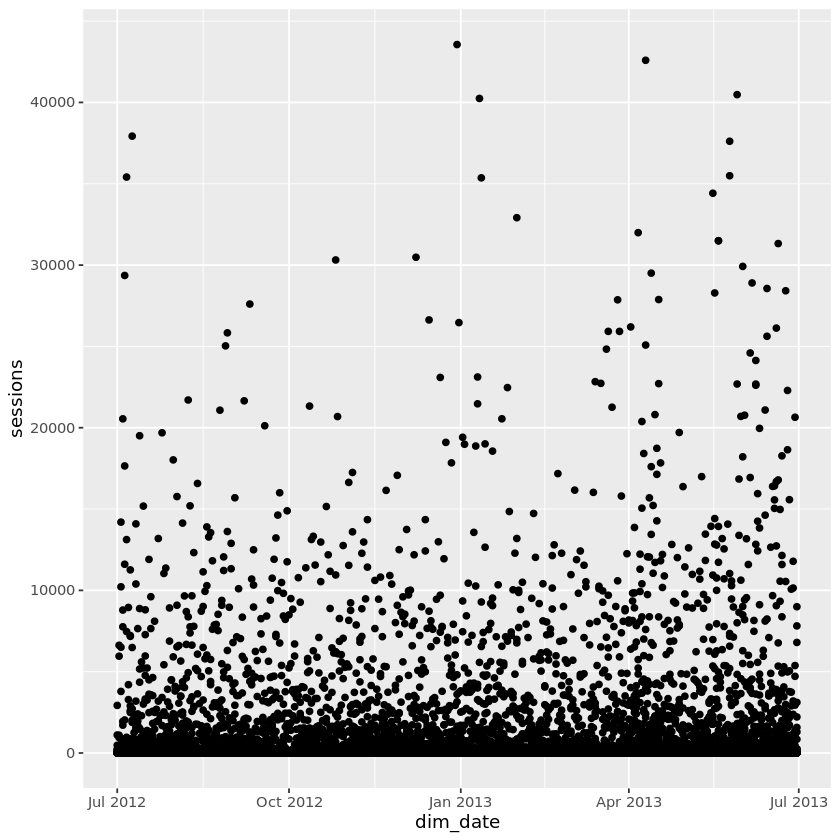

In [48]:
ggplot(sessioncounts) +
     geom_point(aes(x = dim_date, y= sessions))

In [46]:
library(ggplot2)

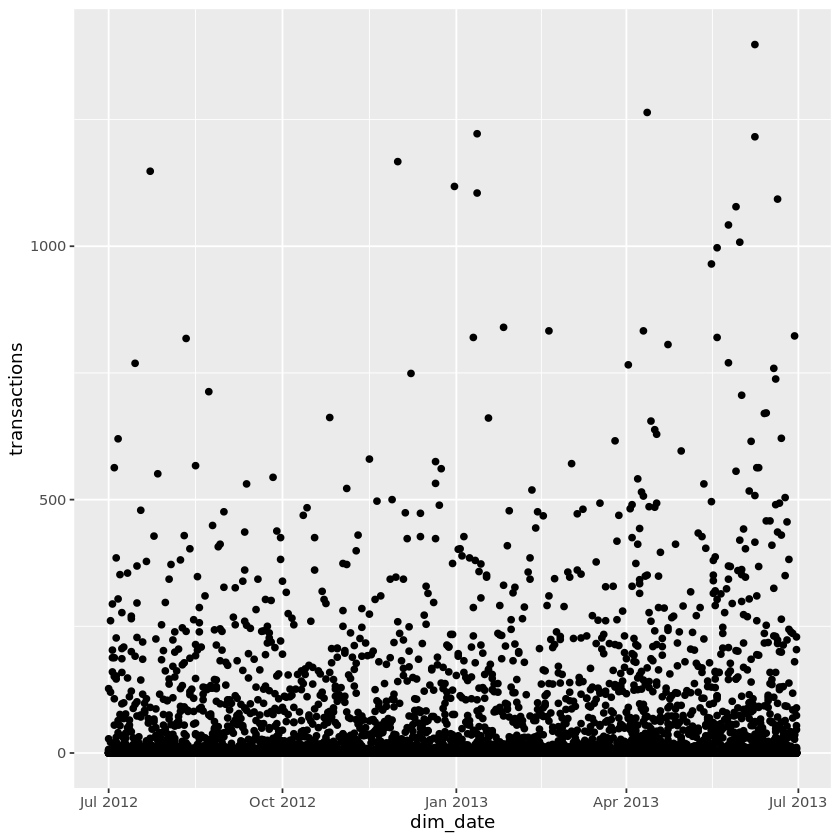

In [49]:
ggplot(sessioncounts) +
     geom_point(aes(x = dim_date, y= transactions))

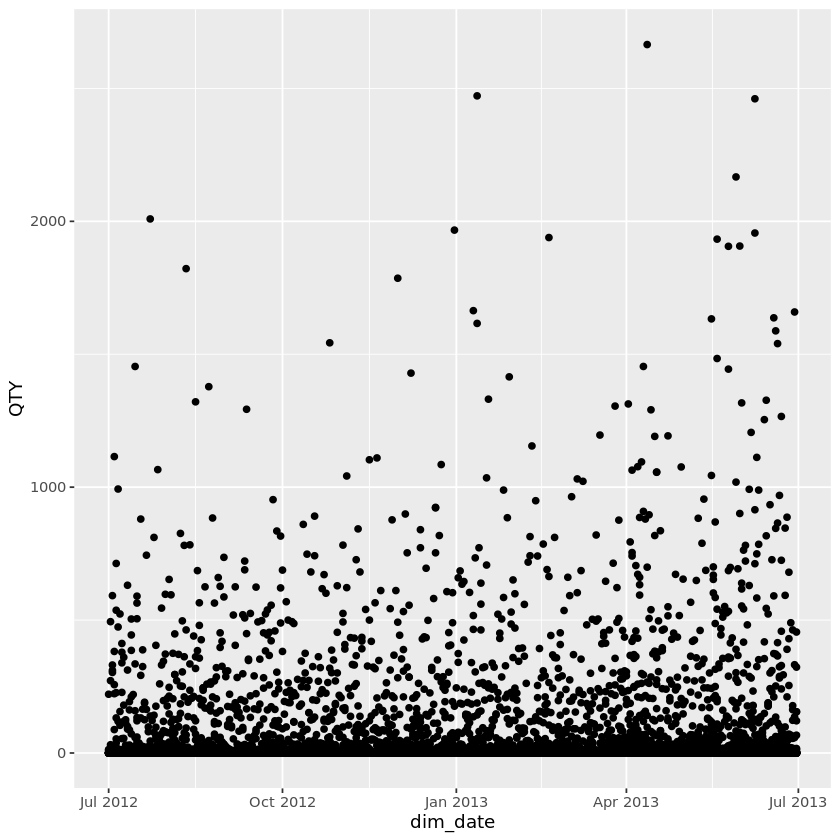

In [51]:
ggplot(sessioncounts) +
     geom_point(aes(x = dim_date, y= QTY))

Finally, checking for any null values

In [223]:
sum(is.na(sessioncounts))

[1] 4716

Part 2: creating the new tables

first, adding a new column called Month to sessioncounts with month and year pulled from the Date column

In [292]:
sessioncounts$month <- format(sessioncounts$dim_date, format="%m-%Y")
head(sessioncounts)

dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY,month
Safari,tablet,2012-07-01,2928,127,221,07-2012
Internet Explorer,desktop,2012-07-01,1106,28,0,07-2012
Chrome,tablet,2012-07-01,474,3,13,07-2012
Amazon Silk,tablet,2012-07-01,235,4,5,07-2012
Internet Explorer,mobile,2012-07-01,178,6,11,07-2012
Internet Explorer,tablet,2012-07-01,120,7,0,07-2012


second, aggregate by month and device catergory and sum over session, transactions, and qty

In [293]:
finaltable1 <- aggregate(cbind(sessions, transactions, QTY) ~  month + dim_deviceCategory, data = sessioncounts, FUN = sum, na.rm = TRUE)

In [294]:
head(finaltable1)

month,dim_deviceCategory,sessions,transactions,QTY
01-2013,desktop,393723,13793,25424
02-2013,desktop,247632,9699,18437
03-2013,desktop,287837,9679,17362
04-2013,desktop,567510,18868,34200
05-2013,desktop,526330,18176,33208
06-2013,desktop,554940,19370,35146


then add a column for ecr

In [295]:
finaltable1$ECR <- final$transactions / final$sessions

In [296]:
head(finaltable1)

month,dim_deviceCategory,sessions,transactions,QTY,ECR
01-2013,desktop,393723,13793,25424,0.03192175
02-2013,desktop,247632,9699,18437,0.03294642
03-2013,desktop,287837,9679,17362,0.03263656
04-2013,desktop,567510,18868,34200,0.03098369
05-2013,desktop,526330,18176,33208,0.03228584
06-2013,desktop,554940,19370,35146,0.03751696


rename dim_deviceCategory to something a little more friendly and voila

In [297]:
finaltable1 <- rename(finaltable1, device_category = dim_deviceCategory) 
finaltable1

month,device_category,sessions,transactions,QTY,ECR
01-2013,desktop,393723,13793,25424,0.031921748
02-2013,desktop,247632,9699,18437,0.032946424
03-2013,desktop,287837,9679,17362,0.032636563
04-2013,desktop,567510,18868,34200,0.030983690
05-2013,desktop,526330,18176,33208,0.032285837
06-2013,desktop,554940,19370,35146,0.037516961
07-2012,desktop,335429,10701,18547,0.035047109
08-2012,desktop,392079,12912,23316,0.039186929
09-2012,desktop,272771,8898,16507,0.033650520
10-2012,desktop,302682,9373,17675,0.033264869


some graphs to make relationships more clear 

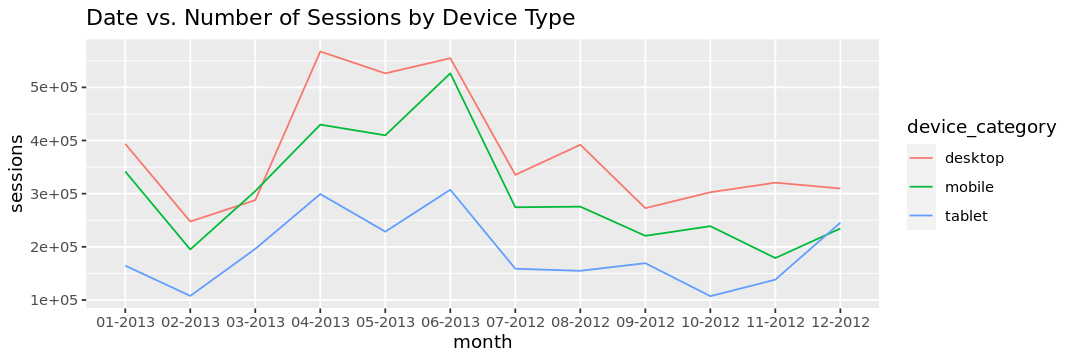

In [327]:
options(repr.plot.width=9, repr.plot.height=3)
ggplot(finaltable1, aes(x = month, y = sessions, colour=device_category, group=device_category)) +
   geom_line() +
    labs(title = "Date vs. Number of Sessions by Device Type")


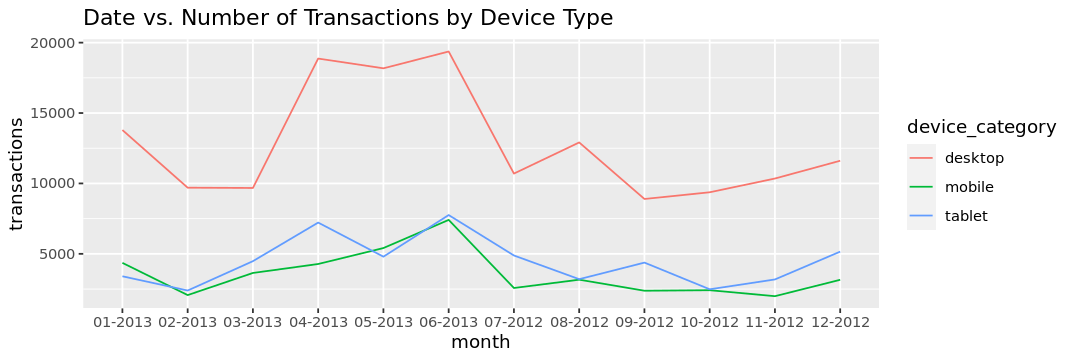

In [329]:
ggplot(finaltable1, aes(x = month, y = transactions, colour=device_category, group=device_category)) +
   geom_line() +
    labs(title = "Date vs. Number of Transactions by Device Type")

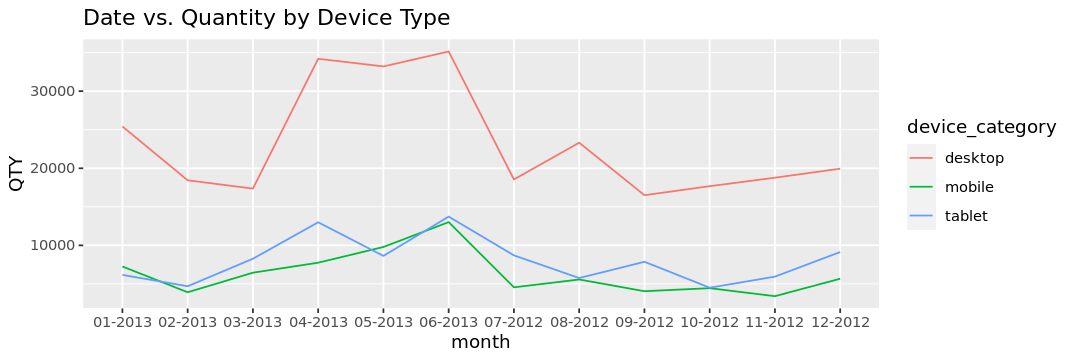

In [330]:
ggplot(finaltable1, aes(x = month, y = QTY, colour=device_category, group=device_category)) +
   geom_line()+
    labs(title = "Date vs. Quantity by Device Type")

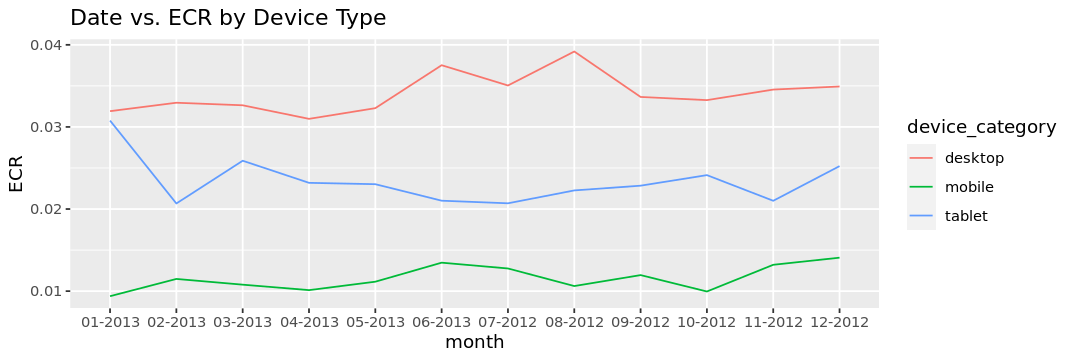

In [331]:
ggplot(finaltable1, aes(x = month, y = ECR, colour=device_category, group=device_category)) +
   geom_line() +
    labs(title = "Date vs. ECR by Device Type")

for the next dataframe, first aggregate by month and add columns for the sums of sessions, transactions, and qty

In [354]:
bymonth <- aggregate(cbind(sessions, transactions, QTY) ~ month, data = sessioncounts, FUN = sum, na.rm = TRUE)
bymonth

month,sessions,transactions,QTY
01-2013,899992,21560,38846
02-2013,550227,14166,27048
03-2013,788820,17804,32082
04-2013,1296613,30369,54946
05-2013,1164639,28389,51629
06-2013,1388834,34538,61891
07-2012,768589,18161,31804
08-2012,822493,19279,34648
09-2012,662653,15658,28426
10-2012,648639,14275,26626


then take a subset of the last 2 months

In [350]:
bymonth_subset <- head(subset(bymonth, month >= "05-2013"), n=2)

In [351]:
bymonth_subset

,month,sessions,transactions,QTY
5,05-2013,1164639,28389,51629
6,06-2013,1388834,34538,61891


add a column for ecr

In [ ]:
bymonth_subset$ECR <- bymonth_subset$transactions / bymonth_subset$sessions

In [353]:
bymonth_subset

,month,sessions,transactions,QTY,ECR
5,05-2013,1164639,28389,51629,0.02437579
6,06-2013,1388834,34538,61891,0.02486834


add a column for addstocart

In [355]:
bymonth_subset$addstocart <- tail(addstocart$addsToCart, n=2)

In [356]:
bymonth_subset

,month,sessions,transactions,QTY,ECR,addstocart
5,05-2013,1164639,28389,51629,0.02437579,136720
6,06-2013,1388834,34538,61891,0.02486834,107970


take the absolute difference and put it into a dataframe

In [361]:
absolutedifference <- data.frame(diff(as.matrix(bymonth_subset[, c("sessions", "transactions", "QTY", "ECR", "addstocart")])))[1,]
absolutedifference$Month <- "" 
absolutedifference$Difference <-"Absolute"

In [362]:
absolutedifference

,sessions,transactions,QTY,ECR,addstocart,Month,Difference
6,224195,6149,10262,0.0004925491,-28750,,Absolute


take the relative difference and put it into another dataframe

In [367]:
v <- diff(as.matrix(bymonth_subset[, c("sessions", "transactions", "QTY", "ECR", "addstocart")]))[1,]/as.matrix(bymonth_subset[, c("sessions", "transactions", "QTY", "ECR", "addstocart")])[1,]
library(data.table)
relativedifference <- transpose(as.data.frame(v))
colnames(relativedifference) <- rownames(as.data.frame(v))
relativedifference$Month <- ""
relativedifference$Difference <- "Relative"

In [368]:
relativedifference

sessions,transactions,QTY,ECR,addstocart,Month,Difference
0.1925017,0.216598,0.1987643,0.02020648,-0.2102838,,Relative


finally, combine dataframes and put columns into a nice order

In [369]:
finaltable2 <- rbind(this, new, those)

In [370]:
finaltable2

,Month,sessions,transactions,QTY,ECR,addstocart,Difference
11,2013-05,1.164384e+06,2.83890e+04,5.162900e+04,0.024381132,1.367200e+05,
12,2013-06,1.388526e+06,3.45380e+04,6.189100e+04,0.024873859,1.079700e+05,
121,,2.241420e+05,6.14900e+03,1.026200e+04,0.000492727,-2.875000e+04,Absolute
1,,1.924984e-01,2.16598e-01,1.987643e-01,0.020209359,-2.102838e-01,Relative


In [386]:
finaltable2 <- finaltable2[, c(7, 1, 2, 3, 4, 5, 6)]

In [387]:
finaltable2

,Difference,Month,sessions,transactions,ECR,QTY,addstocart
11,,2013-05,1.164384e+06,2.83890e+04,0.024381132,5.162900e+04,1.367200e+05
12,,2013-06,1.388526e+06,3.45380e+04,0.024873859,6.189100e+04,1.079700e+05
121,Absolute,,2.241420e+05,6.14900e+03,0.000492727,1.026200e+04,-2.875000e+04
1,Relative,,1.924984e-01,2.16598e-01,0.020209359,1.987643e-01,-2.102838e-01


and write to excel

In [388]:
library(xlsx)
write.xlsx(finaltable1, file="finaltables.xlsx", sheetName="sheet1", row.names=FALSE)
write.xlsx(finaltable2, file="finaltables.xlsx", sheetName="sheet2", append=TRUE, row.names=FALSE)